In [120]:
import pandas as pd
import numpy as np
# Import matplotlib modules.
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update({
    'font.size': 20.0,
    'axes.titlesize': 'small',
    'axes.labelsize': 'small',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small'
})

In [121]:
df = pd.read_csv('agg_data.csv')
df['Month'] = pd.to_datetime(df['month'])
df.drop(columns=['month'], inplace=True)
df['DemandPctChange'] = df['Demand'].pct_change()
df['LogDemand'] = np.log(df['Demand'])
df['LogDemandDiff'] = df['LogDemand'].diff()
df['PricePctChange'] = df['Price'].pct_change()
df['LogPrice'] = np.log(df['Price'])
df['LogPriceDiff'] = df['LogPrice'].diff()

Month = pd.to_datetime(df['Month']).values
Demand = pd.Series(df['Demand']).values
Price = pd.Series(df['Price']).values
DemandPctChange = pd.Series(df['DemandPctChange']).values
LogDemandDiff = pd.Series(df['LogDemandDiff']).values
PricePctChange = pd.Series(df['PricePctChange']).values
LogPriceDiff = pd.Series(df['LogPriceDiff']).values
LogDemand = pd.Series(df['LogDemand']).values
LogPrice = pd.Series(df['LogPrice']).values

# LogPriceTMinus1 = np.delete(np.insert(df['LogPrice'].values,0,df['LogPrice'].values[0]),-1)
# df['LogPriceTMinus1'] = LogPriceTMinus1
# LogPriceTMinus2 = np.delete(np.insert(df['LogPriceTMinus1'].values,0,df['LogPriceTMinus1'].values[0]),-1)
# df['LogPriceTMinus2'] = LogPriceTMinus2

DemandPctChange[0] = 0
LogDemandDiff[0] = 0
PricePctChange[0] = 0
LogPriceDiff[0] = 0

In [122]:
df[['Month','Demand','LogDemand','Price','LogPrice']].head(5)

,Month,Demand,LogDemand,Price,LogPrice
0,2012-01-01,3427,8.139441,27.55,3.316003
1,2012-02-01,2197,7.694848,27.55,3.316003
2,2012-03-01,2907,7.974877,26.55,3.279030
3,2012-04-01,2382,7.775696,27.55,3.316003
4,2012-05-01,3048,8.022241,27.55,3.316003


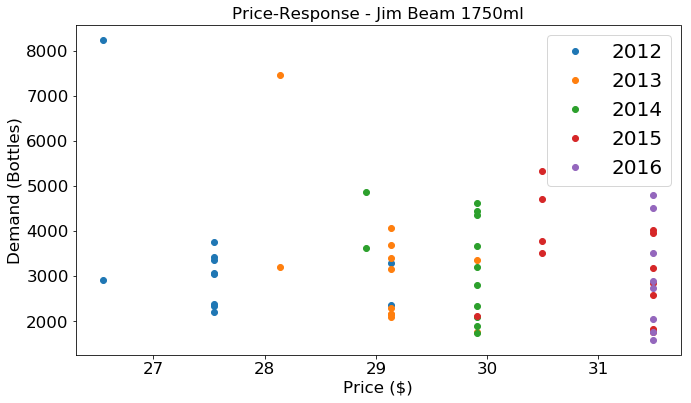

In [123]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 6))
ax.plot(Price[0:12],Demand[0:12],'o',
        Price[12:24],Demand[12:24],'o',
        Price[24:36],Demand[24:36],'o',
        Price[36:48],Demand[36:48],'o',
        Price[48:],Demand[48:],'o');
ax.set_title('Price-Response - Jim Beam 1750ml')  
ax.set_xlabel('Price ($)')
ax.set_ylabel('Demand (Bottles)')
ax.legend(['2012', '2013', '2014', '2015', '2016'], loc=1)
fig.tight_layout()
fig.savefig('img/price_response.png')

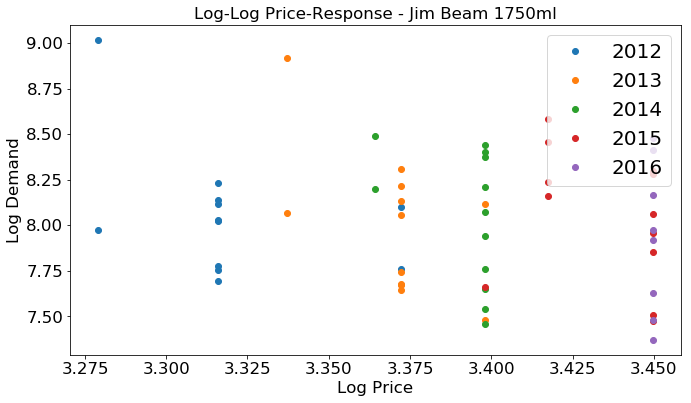

In [124]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 6))
ax.plot(LogPrice[0:12],LogDemand[0:12],'o',
        LogPrice[12:24],LogDemand[12:24],'o',
        LogPrice[24:36],LogDemand[24:36],'o',
        LogPrice[36:48],LogDemand[36:48],'o',
        LogPrice[48:],LogDemand[48:],'o');
ax.set_title('Log-Log Price-Response - Jim Beam 1750ml')  
ax.set_xlabel('Log Price')
ax.set_ylabel('Log Demand')
ax.legend(['2012', '2013', '2014', '2015', '2016'], loc=1)
fig.tight_layout()
fig.savefig('img/log_log_price_response.png')

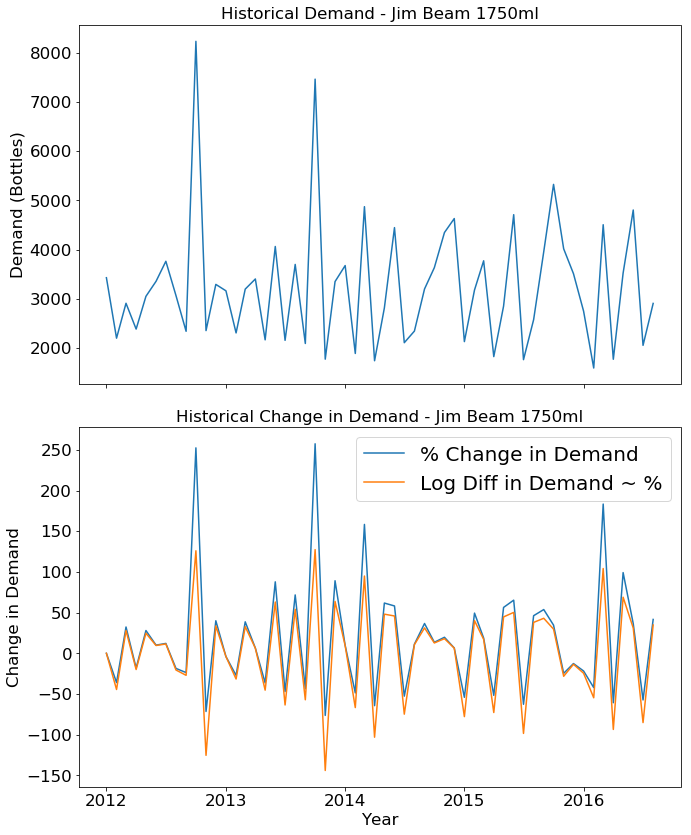

In [125]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 12))
ax[0].plot(Month, Demand);
ax[0].set_title('Historical Demand - Jim Beam 1750ml')  
ax[0].set_ylabel('Demand (Bottles)')
ax[1].plot(Month, DemandPctChange*100, '-',
           Month, LogDemandDiff*100, '-');
ax[1].set_title('Historical Change in Demand - Jim Beam 1750ml')  
ax[1].set_ylabel('Change in Demand')
ax[1].set_xlabel('Year')
ax[1].legend(['% Change in Demand', 'Log Diff in Demand ~ %'], loc=1)
fig.tight_layout()
fig.savefig('img/historical_demand.png')

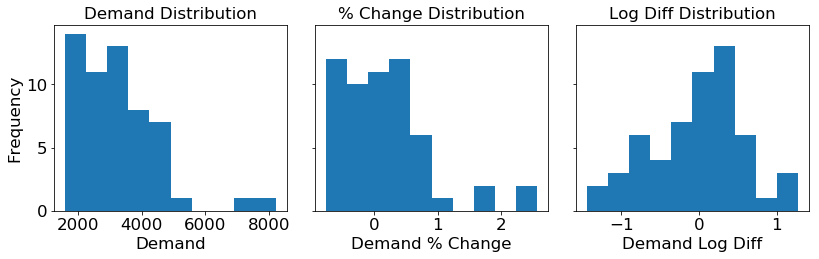

In [126]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12, 4))
ax[0].hist(Demand)
ax[0].set_title('Demand Distribution') 
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Demand')
ax[1].hist(DemandPctChange)
ax[1].set_title('% Change Distribution') 
ax[1].set_xlabel('Demand % Change')
ax[2].hist(LogDemandDiff)
ax[2].set_title('Log Diff Distribution') 
ax[2].set_xlabel('Demand Log Diff')
fig.tight_layout()
fig.savefig('img/demand_hist.png')

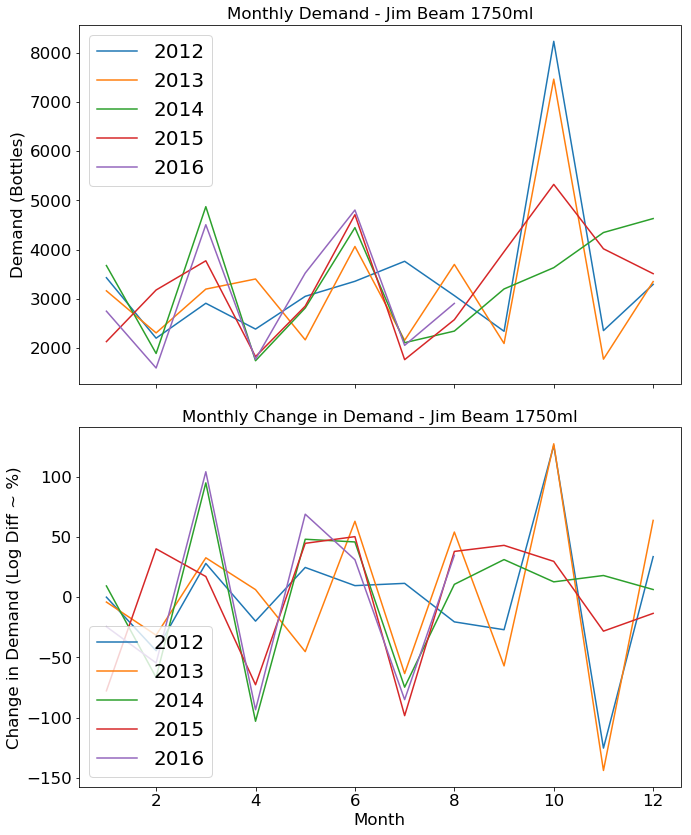

In [127]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 12))
ax[0].plot([i for i in range(1,13)],Demand[0:12],'-',
           [i for i in range(1,13)],Demand[12:24],'-',
           [i for i in range(1,13)],Demand[24:36],'-',
           [i for i in range(1,13)],Demand[36:48],'-',
           [i for i in range(1,9)],Demand[48:],'-');
ax[0].set_title('Monthly Demand - Jim Beam 1750ml')  
ax[0].set_ylabel('Demand (Bottles)')
ax[0].legend(['2012', '2013', '2014', '2015', '2016'], loc=2)

ax[1].plot([i for i in range(1,13)],LogDemandDiff[0:12]*100,'-',
           [i for i in range(1,13)],LogDemandDiff[12:24]*100,'-',
           [i for i in range(1,13)],LogDemandDiff[24:36]*100,'-',
           [i for i in range(1,13)],LogDemandDiff[36:48]*100,'-',
           [i for i in range(1,9)],LogDemandDiff[48:]*100,'-');
ax[1].set_title('Monthly Change in Demand - Jim Beam 1750ml')  
ax[1].set_ylabel('Change in Demand (Log Diff ~ %)')
ax[1].set_xlabel('Month')
ax[1].legend(['2012', '2013', '2014', '2015', '2016'], loc=3)
fig.tight_layout()
fig.savefig('img/monthly_demand.png')

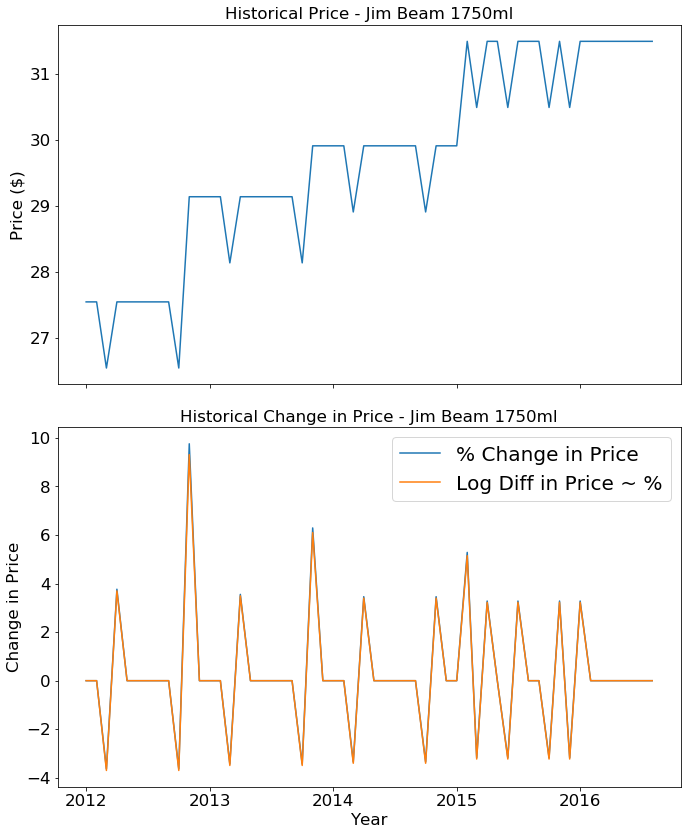

In [128]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 12))
ax[0].plot(Month, Price);
ax[0].set_title('Historical Price - Jim Beam 1750ml')  
ax[0].set_ylabel('Price ($)')
ax[1].plot(Month, PricePctChange*100, '-',
           Month, LogPriceDiff*100, '-');
ax[1].set_title('Historical Change in Price - Jim Beam 1750ml')  
ax[1].set_ylabel('Change in Price')
ax[1].set_xlabel('Year')
ax[1].legend(['% Change in Price', 'Log Diff in Price ~ %'], loc=1)
fig.tight_layout()
fig.savefig('img/historical_price.png')

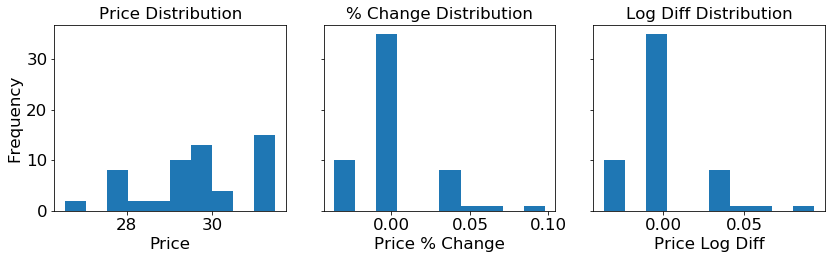

In [129]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12, 4))
ax[0].hist(Price)
ax[0].set_title('Price Distribution') 
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Price')
ax[1].hist(PricePctChange)
ax[1].set_title('% Change Distribution') 
ax[1].set_xlabel('Price % Change')
ax[2].hist(LogPriceDiff)
ax[2].set_title('Log Diff Distribution') 
ax[2].set_xlabel('Price Log Diff')
fig.tight_layout()
fig.savefig('img/price_hist.png')

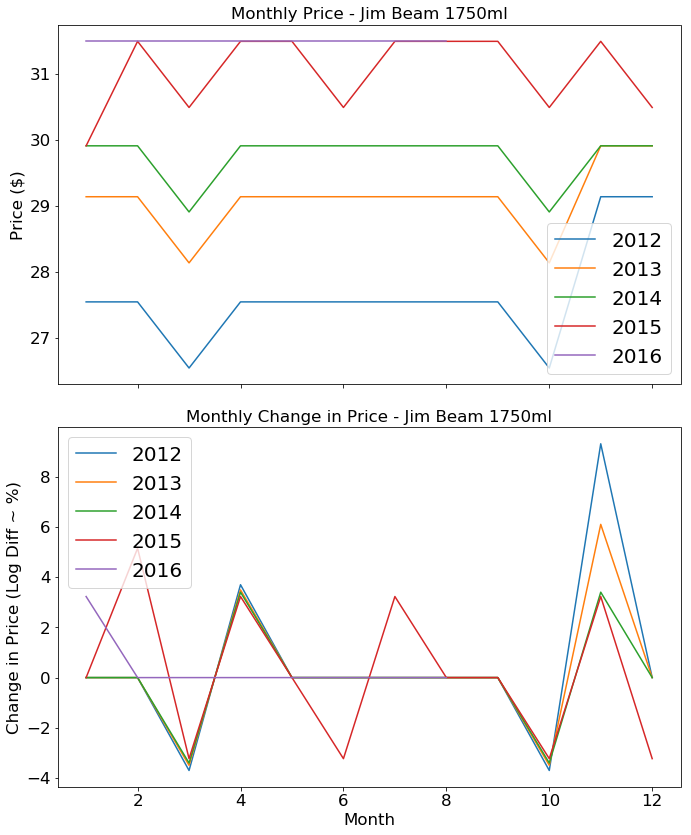

In [130]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 12))
ax[0].plot([i for i in range(1,13)],Price[0:12],'-',
           [i for i in range(1,13)],Price[12:24],'-',
           [i for i in range(1,13)],Price[24:36],'-',
           [i for i in range(1,13)],Price[36:48],'-',
           [i for i in range(1,9)],Price[48:56],'-');
ax[0].set_title('Monthly Price - Jim Beam 1750ml')  
ax[0].set_ylabel('Price ($)')
ax[0].legend(['2012', '2013', '2014', '2015', '2016'], loc=4)
ax[1].plot([i for i in range(1,13)],LogPriceDiff[0:12]*100,'-',
           [i for i in range(1,13)],LogPriceDiff[12:24]*100,'-',
           [i for i in range(1,13)],LogPriceDiff[24:36]*100,'-',
           [i for i in range(1,13)],LogPriceDiff[36:48]*100,'-',
           [i for i in range(1,9)],LogPriceDiff[48:56]*100,'-');
ax[1].set_title('Monthly Change in Price - Jim Beam 1750ml')  
ax[1].set_ylabel('Change in Price (Log Diff ~ %)')
ax[1].set_xlabel('Month')
ax[1].legend(['2012', '2013', '2014', '2015', '2016'], loc=2)
fig.tight_layout()
fig.savefig('img/monthly_price.png')

# Model

In [131]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Ridge
import math

In [132]:
def lin_reg_errors(y_true, y_pred):
    # Mean square error.
    MSE=mean_squared_error(y_true, y_pred)
    # Root mean square error.
    RMSE = math.sqrt(MSE)
    # Coefficient of determination. 
    R2 = r2_score(y_true,y_pred)
    return [MSE, RMSE, R2]

def acc_res_plots(y_true, y_pred):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 12))
    # Accuracy plot.
    ax[0].scatter(y_pred, y_true);
    ax[0].set_title('Accuracy')  
    ax[0].set_ylabel('Actual Demand (Bottles)')
    # Residual plot.
    residuals = y_true - y_pred
    ax[1].scatter(y_pred, residuals);
    ax[1].set_title('Residuals')  
    ax[1].set_ylabel('Residual (Bottles)')
    ax[1].set_xlabel('Predicted Demand (Bottles)')
    # Plot model.
    pred_min = np.amin(y_pred)
    pred_max = np.amax(y_pred)
    ax[0].plot([pred_min, pred_max], [pred_min, pred_max], 'k--')
    ax[1].plot([pred_min, pred_max], [0, 0], 'k--')
    fig.tight_layout()
    return (fig, ax)

def loocv(X, y, model=LinearRegression()):
    leave_one_out = LeaveOneOut()
    predictions = []
    betas = []
    errors = []
    for train_index, test_index in leave_one_out.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        standard_scaler = StandardScaler()
        standard_scaler.fit(X_train)
        X_train_std = standard_scaler.transform(X_train)
        X_test_std = standard_scaler.transform(X_test)
        # Make and fit linear model.
        model.fit(X_train_std, y_train)
        # Get betas.
        betas.append(list(np.squeeze(np.asarray(model.coef_))))
        # Generate predictions.
        y_pred = model.predict(X_test_std)
        predictions.append(np.asarray(y_pred)[0])
        # Compute error measures.
        errors.append(lin_reg_errors(np.exp(y_test), np.exp(y_pred)))
    return (np.array(betas), np.array(errors), np.array(predictions))

In [135]:
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(np.matrix(df['Month'].dt.month).transpose())
X = one_hot_encoder.transform(np.matrix(df['Month'].dt.month).transpose())
X = np.append(X, np.matrix(df['LogPrice']).transpose(), axis=1)

# X = np.append(X, np.matrix(df['LogPriceTMinus1']).transpose(), axis=1)
# X = np.append(X, np.matrix(df['LogPriceTMinus2']).transpose(), axis=1)
# y = np.matrix(df['Demand']).transpose()

y = np.matrix(df['LogDemand']).transpose()

In [136]:
alphas = []
rmse_means = []
for i in range(0,41):
    alpha = 10 + i * 0.1
    alphas.append(alpha)
    ridge_regression = Ridge(alpha=alpha)
    betas, errors, predictions = loocv(X, y, model=ridge_regression)
    RMSEs = errors[:,1]
    rmse_means.append(RMSEs.mean())

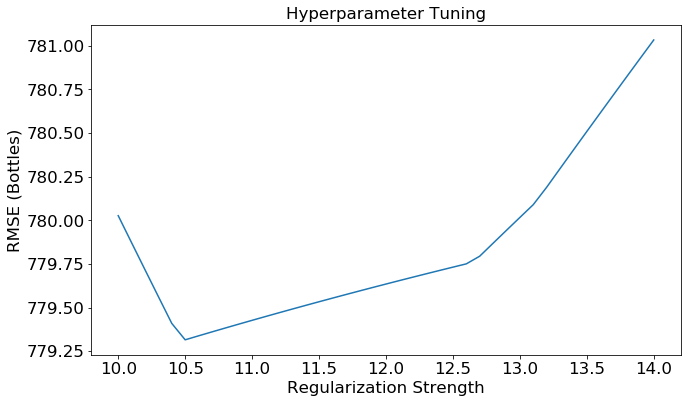

In [137]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 6))
ax.plot(np.array(alphas), np.array(rmse_means));
ax.set_title('Hyperparameter Tuning')  
ax.set_ylabel('RMSE (Bottles)')
ax.set_xlabel('Regularization Strength')
fig.tight_layout()
fig.savefig('img/hyperparameter_tuning.png')

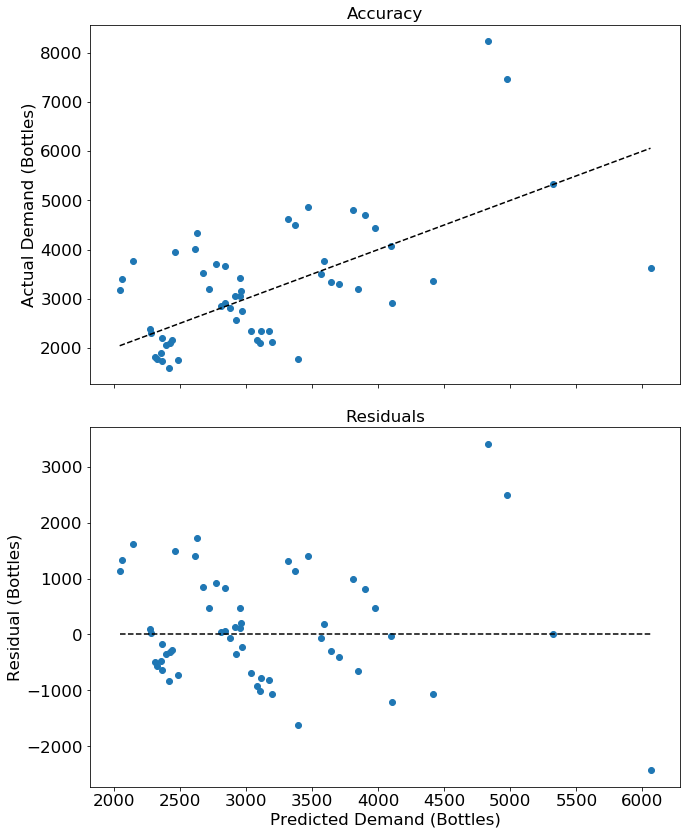

In [138]:
ridge_regression = Ridge(alpha=10.5)
betas, errors, predictions = loocv(X, y, model=ridge_regression)
# Accuracy and residual plots.
fig, ax = acc_res_plots(np.squeeze(np.asarray(np.exp(y))), np.squeeze(np.asarray(np.exp(predictions))))
fig.savefig('img/accuracy_residuals.png')

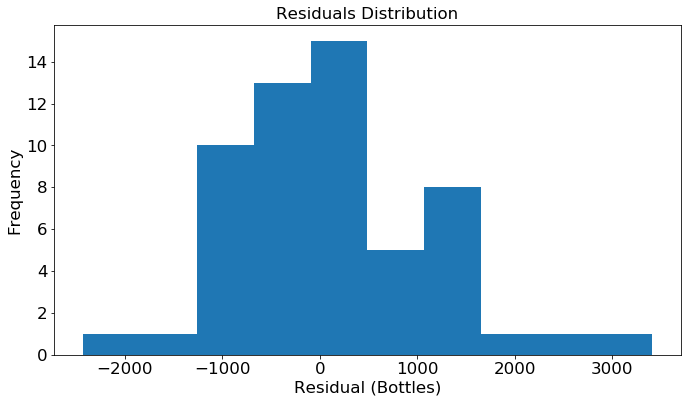

In [139]:
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(10, 6))
ax.hist(np.squeeze(np.asarray(np.exp(y))) - np.squeeze(np.asarray(np.exp(predictions))))
ax.set_title('Residuals Distribution') 
ax.set_ylabel('Frequency')
ax.set_xlabel('Residual (Bottles)')
fig.tight_layout()
fig.savefig('img/residuals_distribution.png')

In [140]:
np.shape(betas)

(56, 13)

In [141]:
np.shape(errors)

(56, 3)

In [142]:
np.shape(predictions)

(56, 1)

In [143]:
RMSEs = errors[:,1]
RMSEs.mean()

779.315280744374

In [144]:
RMSEs.std()

678.2097610928358

In [145]:
np.median(RMSEs)

672.3025952812754

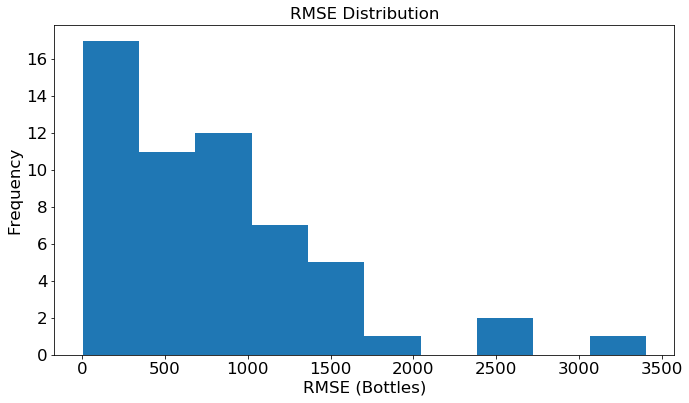

In [146]:
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(10, 6))
ax.hist(RMSEs)
ax.set_title('RMSE Distribution') 
ax.set_ylabel('Frequency')
ax.set_xlabel('RMSE (Bottles)')
fig.tight_layout()
fig.savefig('img/rmse_distribution.png')

# Coef

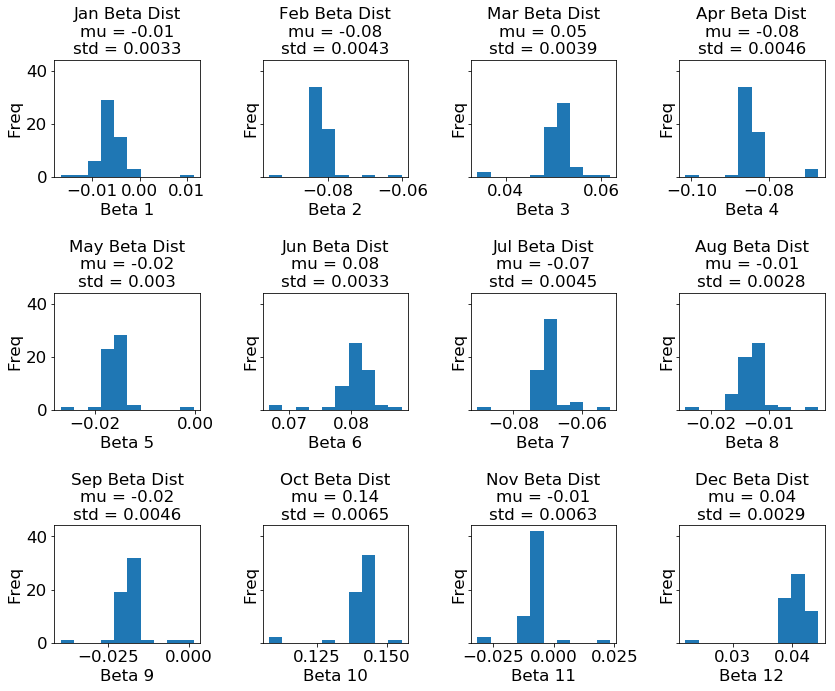

In [147]:
beta_month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
beta_month_means = []
fig, ax = plt.subplots(3, 4, sharey=True, figsize=(12, 10))
for i in range(0,3):
    for j in range(0,4):
        beta_index = 4 * i + j
        beta_no = beta_index + 1
        ax[i][j].hist(betas[:,beta_index])
        ax[i][j].set_title(beta_month[beta_index] + ' Beta Dist' + '\n' + 'mu = ' + str(betas[:,beta_index].mean().round(2)) + '\n' + 'std = ' + str(betas[:,beta_index].std().round(4)))
        ax[i][j].set_ylabel('Freq')
        ax[i][j].set_xlabel('Beta ' + str(beta_no))
        beta_month_means.append(betas[:,beta_index].mean())
fig.tight_layout()
fig.savefig('img/seasonality_betas.png')

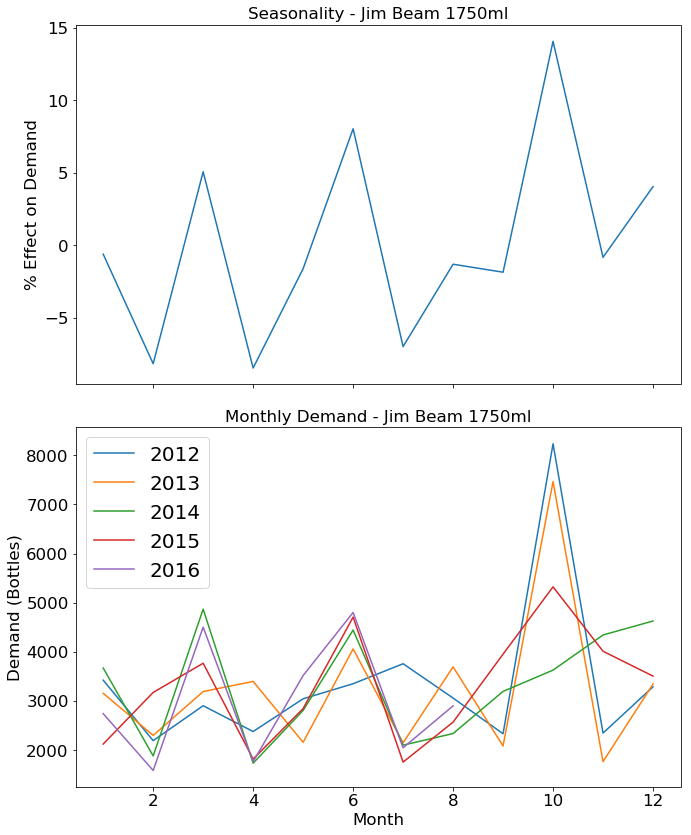

In [148]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 12))
ax[0].plot([i for i in range(1,13)],np.array(beta_month_means)*100,'-')
ax[0].set_title('Seasonality - Jim Beam 1750ml')  
ax[0].set_ylabel('% Effect on Demand')

ax[1].plot([i for i in range(1,13)],Demand[0:12],'-',
           [i for i in range(1,13)],Demand[12:24],'-',
           [i for i in range(1,13)],Demand[24:36],'-',
           [i for i in range(1,13)],Demand[36:48],'-',
           [i for i in range(1,9)],Demand[48:],'-');
ax[1].set_title('Monthly Demand - Jim Beam 1750ml')  
ax[1].set_ylabel('Demand (Bottles)')
ax[1].set_xlabel('Month')
ax[1].legend(['2012', '2013', '2014', '2015', '2016'], loc=2)

fig.tight_layout()
fig.savefig('img/seasonality.png')

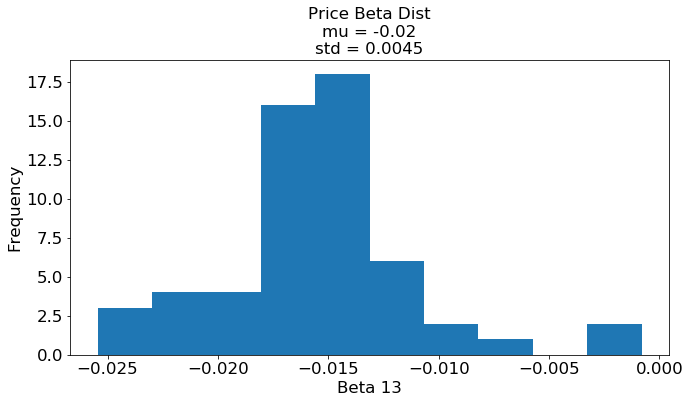

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(betas[:,12])
ax.set_title('Price Beta Dist' + '\n' + 'mu = ' + str(betas[:,12].mean().round(2)) + '\n' + 'std = ' + str(betas[:,12].std().round(4))) 
ax.set_ylabel('Frequency')
ax.set_xlabel('Beta 13')
fig.tight_layout()
fig.savefig('img/price_elasticity_hist.png')